In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [2]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat, mult=np.sqrt(2))
print(res.log_lik)
print(res.pi )
print(res.scale     )
mult=2

-16.917676223632228
[7.62378253e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.34413157e-17 5.25726769e-06 2.36980382e-01 6.36106816e-04
 5.21049870e-12 1.58603289e-17]
[0.         0.03827328 0.05412659 0.07654655 0.10825318 0.15309311
 0.21650635 0.30618622 0.4330127  0.61237244 0.8660254  1.22474487
 1.73205081 2.44948974 3.46410162 4.89897949 6.92820323 9.79795897]


different than library(ashr)
betahat= c( 1,2,3,4,5 )
sebetahat=c( 1,0.4,5,1,1 )
r= ash(betahat , sebetahat, mixcompdist = "normal" )

r$loglik
r$fitted_g

prior= rep(1, length(r$fitted_g$pi))
prior[1]=10
ashr:::penalty(prior, r$fitted_g$pi)


In [3]:
scale=autoselect_scales_mix_norm(betahat  = betahat,
                                         sebetahat= sebetahat,
                                         mult=mult)
L= get_data_loglik_normal(betahat=betahat ,
                                 sebetahat=sebetahat ,
                                 location=0*scale,
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
out= posterior_mean_norm(betahat, sebetahat,
                                 log_pi=np.log(optimal_pi+1e-32), 
                                 scale=scale)

In [4]:
scale

array([0.        , 0.03827328, 0.07654655, 0.15309311, 0.30618622,
       0.61237244, 1.22474487, 2.44948974, 4.89897949, 9.79795897])

In [5]:
print(res.log_lik)
print(res.log_lik2)

-16.917676223632228
-9.383938806464148


In [6]:
print(np.exp(L) * np.exp(optimal_pi))
print((np.exp(L) * np.exp(optimal_pi)).shape)



log_lik =    np.sum( np.log( np.sum( np.exp(L) * np.exp(optimal_pi) , axis=0)))

[[5.20259948e-01 2.41970595e-01 2.41968664e-01 2.41938509e-01
  2.41499598e-01 2.36501255e-01 2.06576619e-01 1.43080328e-01
  9.70177435e-02 4.02981925e-02]
 [7.99146900e-06 4.14419530e-06 5.67727637e-06 1.71434569e-05
  2.99017321e-04 1.29778396e-02 9.28131811e-02 1.18400878e-01
  9.26844908e-02 3.98455744e-02]
 [1.43292884e-01 6.66436710e-02 6.66399227e-02 6.66249342e-02
  6.65650602e-02 6.63268389e-02 6.53941666e-02 6.31577118e-02
  6.44948202e-02 3.49434622e-02]
 [2.87747646e-04 1.35306388e-04 1.39805592e-04 1.58887214e-04
  2.54037078e-04 1.01147338e-03 1.02848443e-02 4.90077101e-02
  7.18725121e-02 3.72997651e-02]
 [3.19658760e-06 1.51304459e-06 1.59435046e-06 1.95667780e-06
  4.15035767e-06 3.83377890e-05 1.70007332e-03 2.57676671e-02
  6.00329684e-02 3.56088883e-02]]
(5, 10)


In [7]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [8]:
res= ash(betahat, sebetahat)
print(res.pi) 

[6.09193519e-01 1.35669001e-04 5.22151621e-05 2.10494944e-05
 9.34149239e-06 5.08630411e-06 4.33968421e-06 9.85001438e-06
 1.22045065e-04 7.12867901e-03 2.80544947e-01 1.02768652e-01
 4.60701887e-06 1.56833610e-14 1.06241438e-18 0.00000000e+00]


nice conservative behaviour

Text(0, 0.5, 'posterior mean')

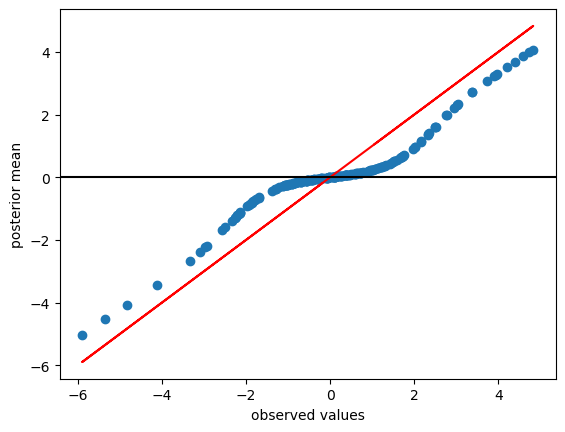

In [9]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [10]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

1.0143464328768839
0.8036359616373067


In [11]:
true_val1=  np.random.normal(loc=0, scale=2, size=1000)
true_val0=  np.zeros( 1000)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=1000)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=1000)

# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])

In [12]:
res= ash(betahat, sebetahat)
print(res.pi) 

[4.21106192e-01 5.33249242e-02 2.00316670e-02 7.68674927e-03
 3.08116806e-03 1.35342912e-03 7.25744635e-04 6.13859447e-04
 1.43280155e-03 1.54474802e-02 2.37781750e-01 2.36935603e-01
 4.78631088e-04 2.03290941e-10 1.10524940e-19 0.00000000e+00
 0.00000000e+00]


in the large scale regime works well

Text(0, 0.5, 'posterior mean')

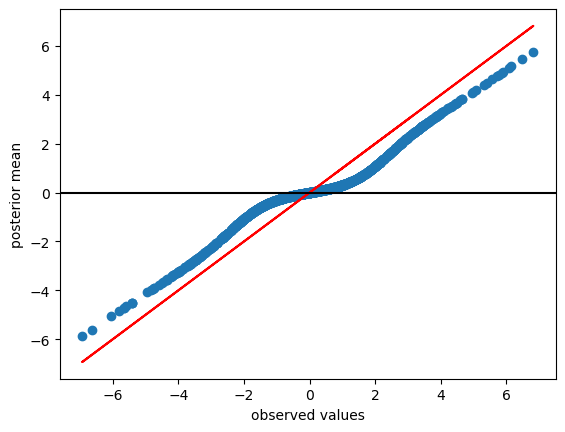

In [13]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

Text(0, 0.5, 'posterior mean')

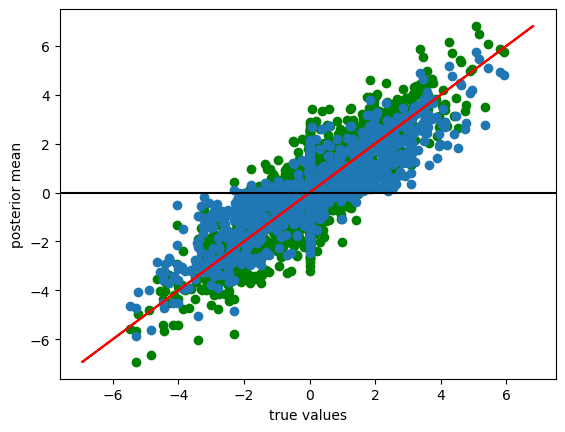

In [14]:
plt.scatter(np.concatenate((true_val1 , true_val0))    , betahat ,color="green" )
plt.scatter(np.concatenate((true_val1 , true_val0))    , res.post_mean  )
plt.xlabel("true values") 
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [15]:
print( np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - betahat )**2)))
print(np.sqrt(np.mean((np.concatenate((true_val1 , true_val0))     - res.post_mean  )**2)))

1.0101806903436896
0.7737601659833085
